### Authors and Institutions

In [1]:
# give sql language

auth_docu ='''
select full_name, title, count(title)
from authors a, documents b, documents_authors c
where a.id=c.authors_id and c.documents_id=b.id
group by full_name
order by count(title) desc;
'''

auth_key = '''
select full_name, keyword, count(keyword)
from authors a, documents b, documents_authors c, keywords k, documents_keywords kd
where a.id=c.authors_id and c.documents_id=b.id and k.id=kd.keyword_id and b.id = kd.keyword_id
group by full_name
order by count(keyword) desc;
'''

auth_inst = '''
select institution, full_name, count(full_name)
from authors
group by institution
order by count(full_name) desc;
'''

inst_docu = '''
select institution, title, count(title)
from authors a, documents b, documents_authors c
where a.id=c.authors_id and b.id=c.documents_id
group by institution
order by count(title) desc;
'''


inst_key ='''
select distinct institution, keyword, count(keyword)
from authors a, documents b, documents_authors c, keywords k, documents_keywords kd
where a.id=c.authors_id and c.documents_id=b.id and k.id=kd.keyword_id and b.id = kd.keyword_id
group by institution
order by count(keyword) desc;
'''

auth_na_inst = '''
select institution, full_name
from authors
where institution = '';
'''


### Documents

In [2]:
document_authors = '''
select title, full_name, count(full_name)
from authors a, documents_authors b, documents c
where a.id=b.authors_id and c.id = b.documents_id
group by title
order by count(full_name) desc
'''


# the documents from "author" ---"MIS//Qurterly"
MISQ_docu = '''
select title 
from documents, documents_authors b, authors c
where documents.id=b.documents_id and c.id=b.authors_id and c.full_name= "MIS//Quarterly"
'''

### Keywords

In [22]:
#keywords and document (which keyword has max documents)

keywords_documents = '''
select keyword, title, article_id, count(title)
from documents doc, documents_keywords dk, keywords kw
where doc.id=dk.documents_id and  kw.id=dk.keyword_id
group by keyword
order by count(title) desc
'''

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import networkx as nx
import itertools
import sqlite3

In [4]:
con = sqlite3.connect("data.sqlite")

In [6]:
auth_key_mod = '''
select full_name, keyword
from authors a, documents b, documents_authors c, keywords k, documents_keywords kd
where a.id=c.authors_id and c.documents_id=b.id and k.id=kd.keyword_id and b.id = kd.keyword_id;
'''

In [7]:
X = pd.read_sql(auth_key_mod, con)

In [12]:
X

,full_name,keyword
0,Gerald//Matlin,Collaborative telelearning
1,A.//Jenkins,technology mediated learning
2,Randall//Johnson,technology mediated learning
3,Alfonso//Cardenas,desktop videoconferencing
4,Alfonso//Cardenas,desktop videoconferencing
5,Robert//Bostrom,collaborative work ssytems
6,J.//Heinen,collaborative work ssytems
7,James//Johnson,IT in business education
8,Kenneth//Kozar,IT in business education
9,David//Ruch,IT in business education


In [9]:
auth_docu_mod ='''
select full_name, title
from authors a, documents b, documents_authors c
where a.id=c.authors_id and c.documents_id=b.id;
'''

In [10]:
Q = pd.read_sql(auth_docu_mod, con)

In [11]:
Q

,full_name,title
0,Gerald//Matlin,How to Survive a Management Assessment
1,A.//Jenkins,What the Information Analyst Should Know About...
2,Randall//Johnson,What the Information Analyst Should Know About...
3,Alfonso//Cardenas,Technology for the Automatic Generation of App...
4,Robert//Bostrom,MIS Problems and Failures: A Socio-Technical P...
5,J.//Heinen,MIS Problems and Failures: A Socio-Technical P...
6,James//Johnson,RAFT: An Information System for Fiscal Analysis
7,Kenneth//Kozar,RAFT: An Information System for Fiscal Analysis
8,David//Ruch,RAFT: An Information System for Fiscal Analysis
9,Rob//Kling,The Organizational Context of User-Centered So...


In [45]:
Author = Q.groupby("full_name").size()
Author

full_name
'Jon (Sean)//Jasperson         1
A.//Jenkins                    1
A.R.//Montazemi                1
ARUN//SUNDARARAJAN             1
Abdulla//Abdul-Gader           1
Abhay/Nath/Mishra              1
Abhijit//Chaudhury             1
Abhijit//and                   1
Abraham//Bernstein             1
Adam//Saunders                 1
Adam/M/Mahmood                 1
Adamantios//Diamantopoulos     1
Adela/J./Chen                  1
Adrian//Yeow                   1
Ahmed//Abbasi                  3
Ajay//Vinze                    1
Alain//Pinsonneault           10
Alan//Burns                    1
Alan//Dennis                   5
Alan//Merten                   1
Alan/R./Dennis                 6
Alan/R./Hevner                 2
Albert//Crews                  1
Albert//Dexter                 5
Albert//Lederer                7
Albert//Segars                 2
Albert//Sengars                1
Aleksi//Aaltonen               1
Alexander//Maish               1
Alexander//Serenko             1


In [24]:
len(Author)

1685

In [30]:
from matplotlib import pyplot as plt

In [25]:
%matplotlib inline

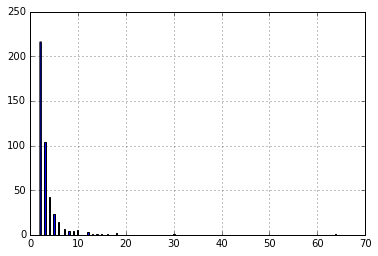

In [46]:
Author[Author>1].hist(bins =200)

In [40]:
a = Author[Author>1]
b = a[a<20]
c = Author[Author == 1]
print(len(c))
print(len(b))

1255
428


In [42]:
d = Author[Author>=20]
d

full_name
Izak//Benbasat    30
MIS//Quarterly    64
dtype: int64

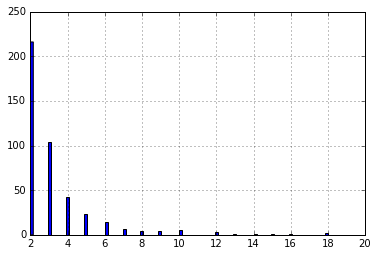

In [44]:
b.hist(bins= 100)